In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from numpy.linalg import inv

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# config

In [151]:
curr_path = os.getcwd()
config_file = expts_path+'\\config_rfsoc_ziqian.yml'
config_path = config_file
print('Config will be', config_path)


Config will be C:\_Lib\python\multimode_expts\config_rfsoc_ziqian.yml


In [152]:
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# F0g1 Spectroscopy

Found peak in amps at [MHz] 2012.238353420051, HWHM 0.2694219184542896
Found peak in I at [MHz] 2012.2156833268537, HWHM 0.3813691592634866
Found peak in Q at [MHz] 2012.231621175017, HWHM -0.32455566194472873


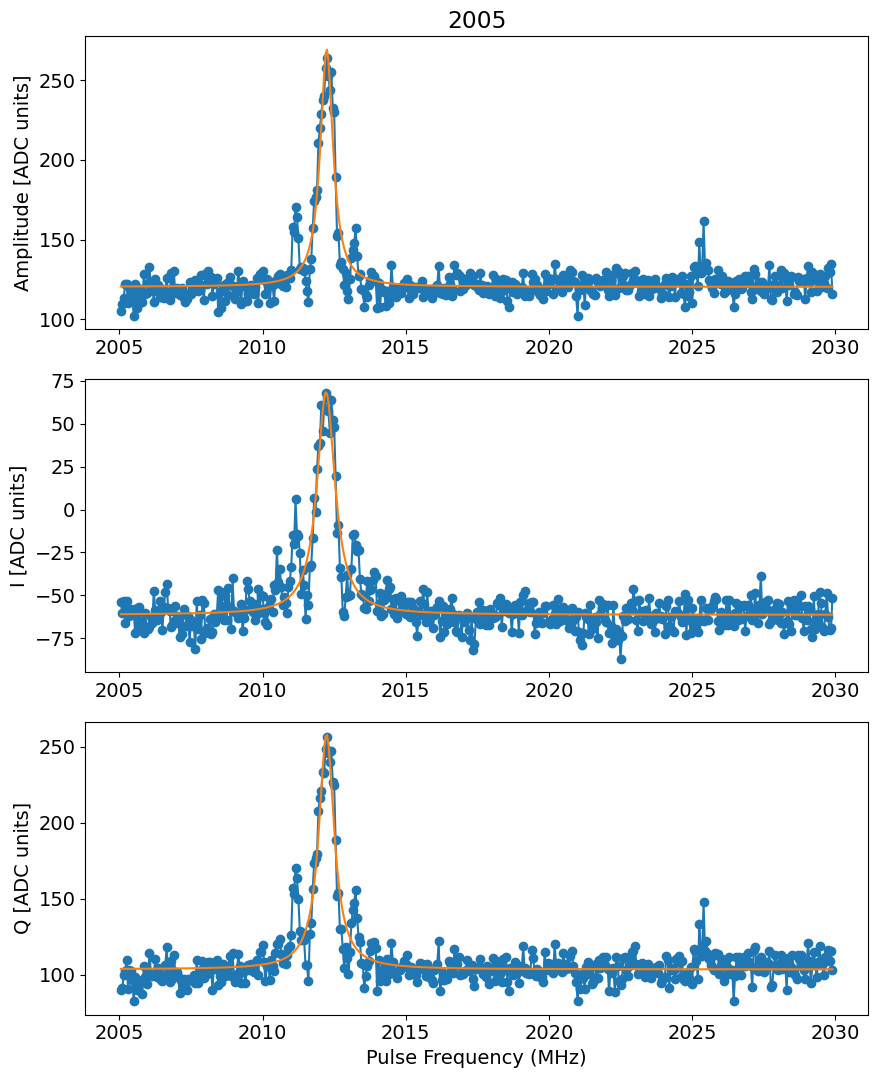

In [195]:
temp_data, attrs = prev_data(expt_path, '00018_PulseProbeF0g1SpectroscopyExperiment.h5')
#temp_data, attrs = prev_data(expt_path, '00122_fluxspectroscopy_f0g1_dc_flux_sweep.h5')

qubit_spectroscopy_display(temp_data, title=attrs['config']['expt']['start'], vlines=None)
# gain from attrs

# Length Rabi Sweep

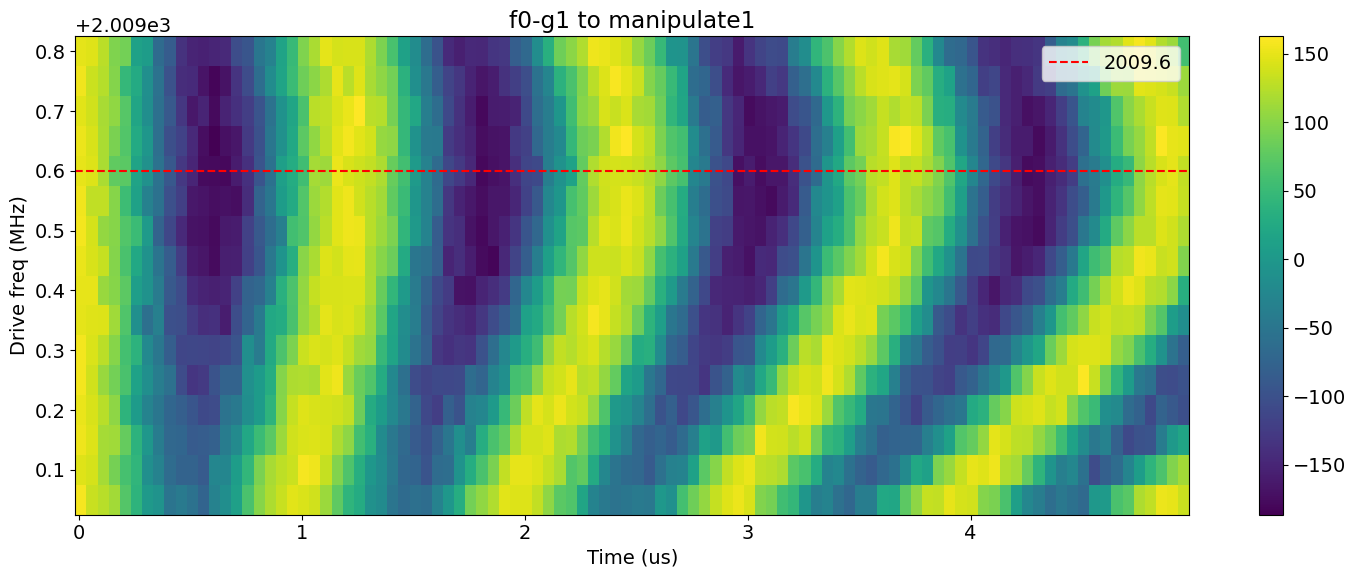

In [249]:
file_list = np.arange(405, 421, 1) # -------

y_list = []
freq_list = []
name = '_length_rabi_f0g1_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try:
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi'][0:-1]

        
        len_x = temp_data['xpts'][0:-1]
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['freq'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[2009.6], vlines=None, normalize = normalize, title="f0-g1 to manipulate1")

## Length rabi f0-g1 M1

[177.38438611   0.81444639  92.17948525  69.20811274 -12.63935726
  -2.93252359]
Decay from avgi [us] 69.20811274371528
Rate [MHz] 0.8144463852184186
Pi length from avgi data [us]: 0.6064805287150742
	Pi/2 length from avgi data [us]: 0.29952355212667064
Fit params:  [177.38438611   0.81444639  92.17948525  69.20811274 -12.63935726
  -2.93252359]

Decay from avgq [us] 108.34711859573311
Rate [MHz] 0.8143332169344287
Pi length from avgq data [us]: 0.6058684580082155
Pi/2 length from avgq data [us]: 0.30293422900410777
Fit params:  [ 217.76137047    0.81433322   92.38362824  108.3471186  -101.27569746
   -2.92926845]


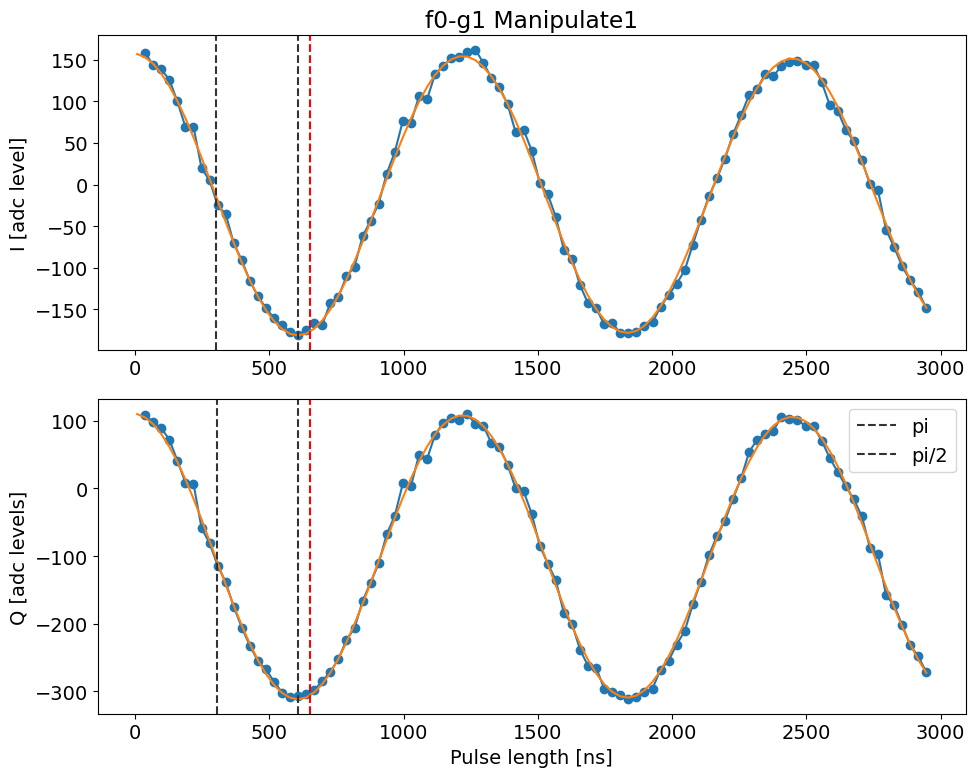

In [250]:
temp_data, attrs = prev_data(expt_path, '00012_LengthRabiGeneralF0g1Experiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None, None,None,None,None,None ],
                              vlines = [650],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='f0-g1 Manipulate1')

## Manipulate 1 T1

Fit T1 avgi [us]: 104.53859432220798
Fit T1 avgq [us]: 101.37795980122726


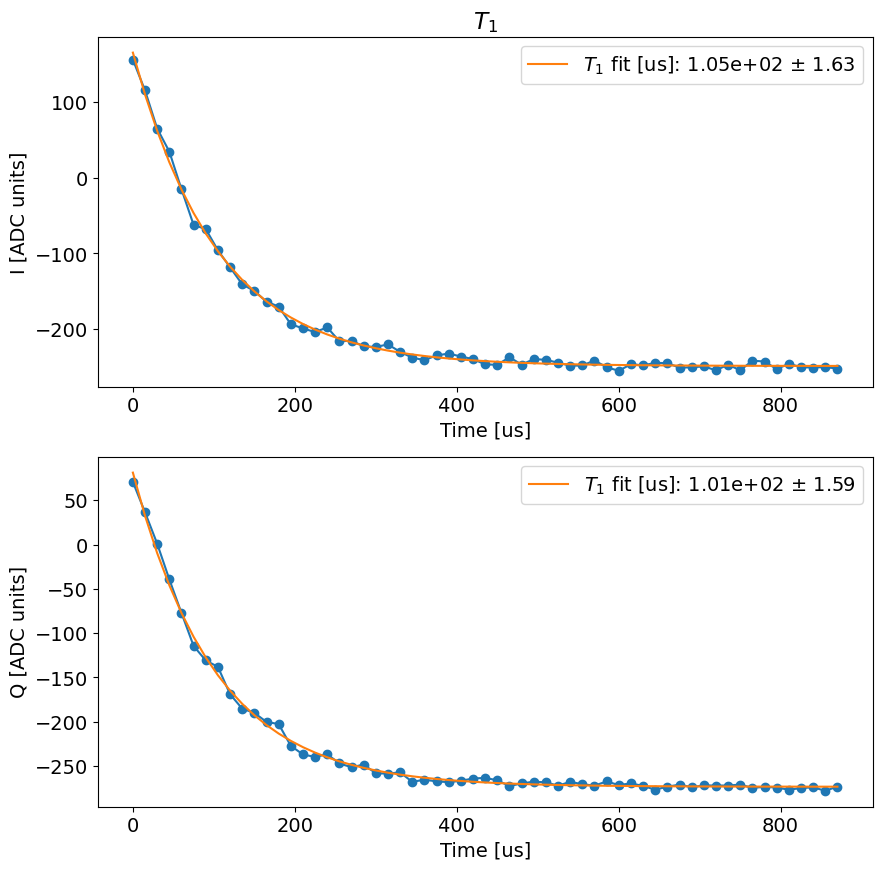

In [350]:
# DC flux=0.27, expid=1
# DC flux=0.17, expid=2
# temp_data, attrs = prev_data(expt_path, '00010_T1CavityExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00082_cavity_t1_dc_flux_sweep_new.h5')
t1_display(data = temp_data, fit = True, active_reset = False)

In [307]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': 127.0,
    'f_ge': 3568.1751638611518,
    'f_ge_resolved': 3568.1751638611518,
    'f_ge_idle': 3568.1751638611518,
    'f_ef': 3425.5564066067,
    'f_ef_idle': 3425.5564066067,
    'ramp_sigma': 0.005,
    'ramp_sigma_num': 3,
    'pulses': {'pi_ge': {'gain': 10716,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
      'length': 0.190914187445986,
      'type': 'flat_top'},
     'pi_ge_fast': {'gain': 10682,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_resolved': {'gain': 50,
      'sigma': 0.005,
      'length': 6.553697146578866,
      'type': 'flat_top',
      'repeat_no': 1},
     'hpi_ge': {'gain': 5510, 'length': 0, 'sigma': 0.035, 'type': 'gauss'},
     'hpi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
   

# Scan Dataset

In [251]:
# Original lists
currents = [0.08, 0.12, 0.22, 0.32, 0.5, 0.27, 0.17, -0.1, -0.2, 0, 0.6, 0.55, 0.4]
f0g1_freqs = [
    1993.55, 1996.45, 2002.55, 2007, 2011.97, 
    2005, 1999.7, 1980.8, 1977.7, 1987.46, 2013.8, 2012.93, 2009.6
]
pi_lengths = [
    0.562878407, 0.573263647, 0.597216575, 0.604688822, 0.608122803, 
    0.607997218, 0.588880852, 0.556092728, 0.55045291, 0.556268435, 0.61,0.608686712, 0.606480529


]

# Combine the lists and sort by currents
combined = sorted(zip(currents, f0g1_freqs, pi_lengths))

# Unzip the combined list back into separate lists
currents, f0g1_freqs, pi_lengths = zip(*combined)

# Convert back to lists
currents = list(currents)
f0g1_freqs = list(f0g1_freqs)
pi_lengths = list(pi_lengths)

print("Sorted currents:", currents)
print("Updated f0g1_freqs:", f0g1_freqs)
print("Updated pi_lengths:", pi_lengths)



Sorted currents: [-0.2, -0.1, 0, 0.08, 0.12, 0.17, 0.22, 0.27, 0.32, 0.4, 0.5, 0.55, 0.6]
Updated f0g1_freqs: [1977.7, 1980.8, 1987.46, 1993.55, 1996.45, 1999.7, 2002.55, 2005, 2007, 2009.6, 2011.97, 2012.93, 2013.8]
Updated pi_lengths: [0.55045291, 0.556092728, 0.556268435, 0.562878407, 0.573263647, 0.588880852, 0.597216575, 0.607997218, 0.604688822, 0.606480529, 0.608122803, 0.608686712, 0.61]


In [252]:
# now creating a dataframe 
df = pd.DataFrame({'currents': currents, 'f0g1_freqs': f0g1_freqs, 'pi_lengths': pi_lengths})
df

,currents,f0g1_freqs,pi_lengths
0,-0.20,1977.70,0.550453
1,-0.10,1980.80,0.556093
2,0.00,1987.46,0.556268
3,0.08,1993.55,0.562878
4,0.12,1996.45,0.573264
5,0.17,1999.70,0.588881
6,0.22,2002.55,0.597217
7,0.27,2005.00,0.607997
8,0.32,2007.00,0.604689
9,0.40,2009.60,0.606481


Text(0, 0.5, 'Manipulate1 Frequency (GHz)')

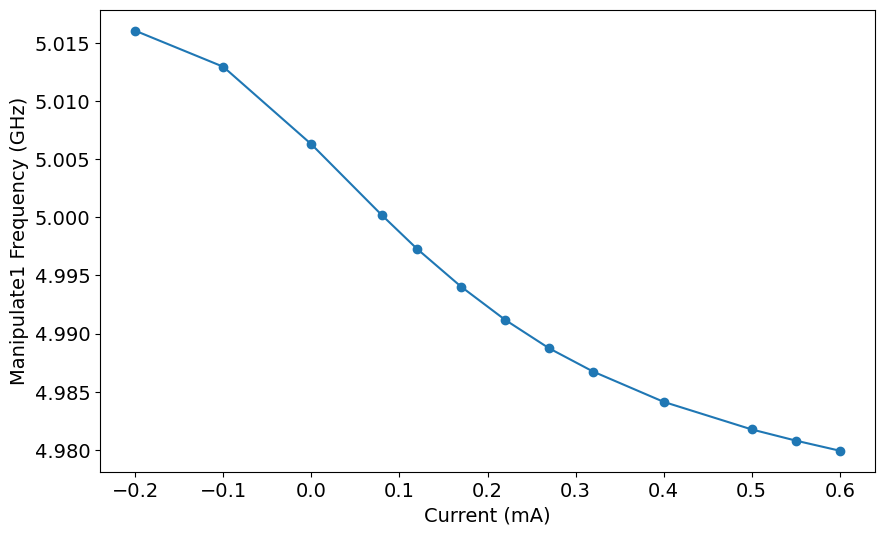

In [253]:
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
# plot current vs f0g1_freqs
plt.plot(df['currents'], (-1 * np.array(df['f0g1_freqs'].values) + qubit_gf) * 1e-3, 'o-')
plt.xlabel('Current (mA)')
plt.ylabel('Manipulate1 Frequency (GHz)')

## Prepping for T1 scan on manipulate using interpolation of refernce data 

Interpolated frequency at current 0.55: 2012.93


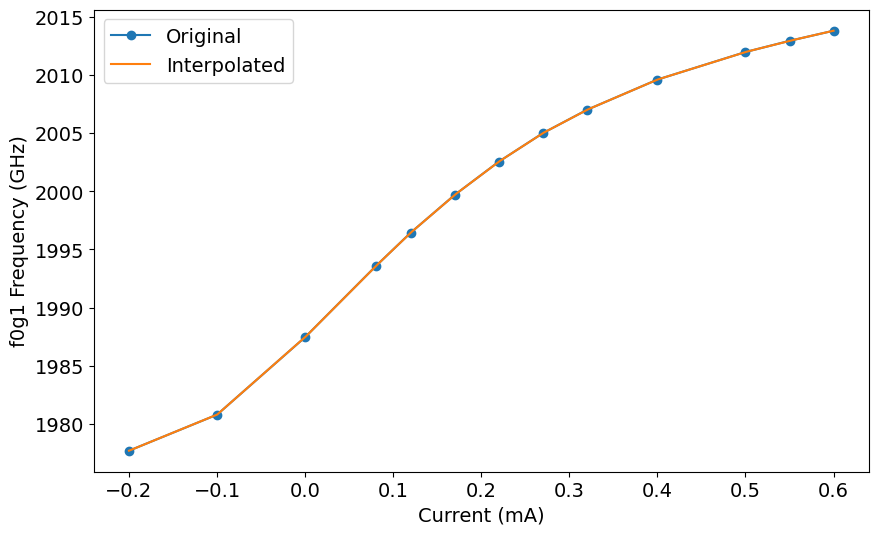

In [254]:

from scipy.interpolate import interp1d

# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
interp_func = interp1d(currents, f0g1_freqs, kind='linear', fill_value="extrapolate")

# Interpolate frequency at current of 0.55
current_to_interpolate = 0.55
interpolated_frequency = interp_func(current_to_interpolate)

print(f"Interpolated frequency at current {current_to_interpolate}: {interpolated_frequency}")
#plot 
plt.plot(currents, f0g1_freqs, 'o-', label='Original')
xdata = np.linspace(min(currents), max(currents), 1000)
plt.plot(xdata, interp_func(xdata), '-', label='Interpolated')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()

In [339]:
# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
f0g1_interp_func = interp1d(currents, f0g1_freqs, kind='linear', fill_value="extrapolate")
pi_interp_func = interp1d(currents, pi_lengths, kind='linear', fill_value="extrapolate")

# currents
custom_currents = [0.55, 0.56, 0.575, 0.58, 0.585, 0.59, 0.595]
currents_interped = np.round(np.linspace(min(currents), max(currents), 30), 2).tolist() #+ [0.56, 0.58, 0.59]
currents_interped = np.sort(np.array(currents_interped + custom_currents))

f0g1_freqs_interped = f0g1_interp_func(currents_interped)
pi_lengths_interped = pi_interp_func(currents_interped)

interp_df = pd.DataFrame({'currents': currents_interped, 'f0g1_freqs': f0g1_freqs_interped, 'pi_lengths': pi_lengths_interped})
interp_df

,currents,f0g1_freqs,pi_lengths
0,-0.200,1977.70000,0.550453
1,-0.170,1978.63000,0.552145
2,-0.140,1979.56000,0.553837
3,-0.120,1980.18000,0.554965
4,-0.090,1981.46600,0.556110
5,-0.060,1983.46400,0.556163
6,-0.030,1985.46200,0.556216
7,-0.010,1986.79400,0.556251
8,0.020,1988.98250,0.557921
9,0.050,1991.26625,0.560400


In [343]:
interp_df['currents'].values

array([-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ])

In [268]:
f0g1_interp_func(0.4)

array(2009.6)

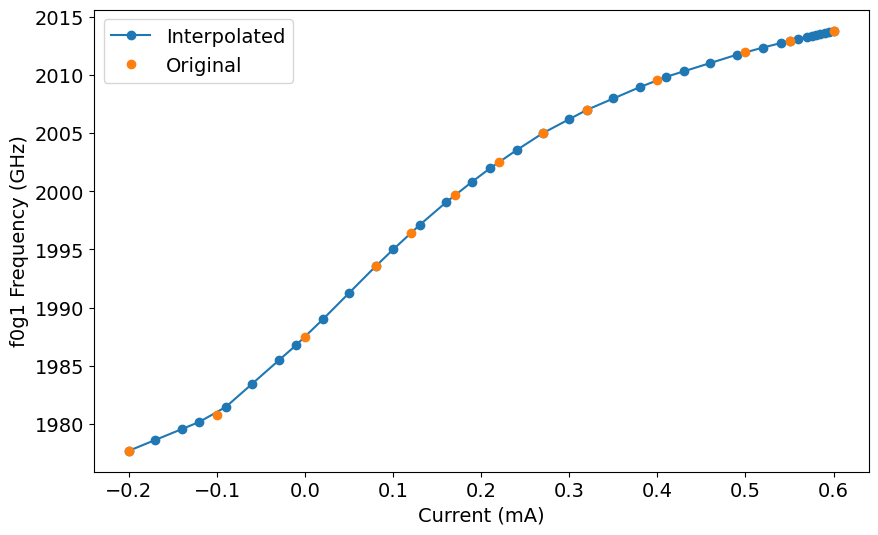

In [269]:
# compare interperted data with original data
# plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['f0g1_freqs'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()


Text(0, 0.5, 'Pi Pulse Length (us)')

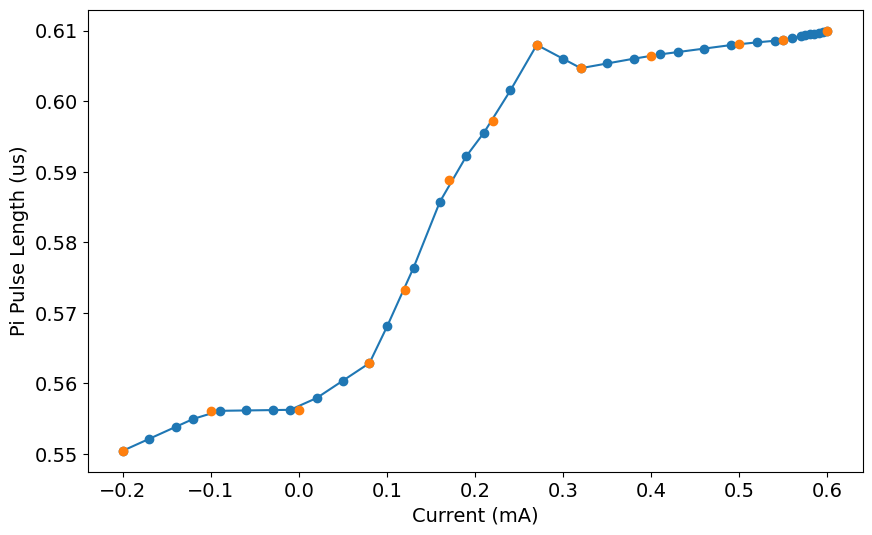

In [270]:
# compare interperted data with original data
# plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['pi_lengths'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('Pi Pulse Length (us)')

## Manipulate 1 T1 data

In [337]:
DC_flux_list = [-0.2 , -0.17, -0.14, -0.12, -0.09, -0.06, -0.03, -0.01,  0.02,
        0.05,  0.08,  0.1 ,  0.13,  0.16,  0.19,  0.21,  0.24,  0.27,
        0.3 ,  0.32,  0.35,  0.38,  0.41,  0.43,  0.46,  0.49,  0.52,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ]
data_file_list = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62, 65,68,71,74,77, 79]
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

C:\_Lib\python\multimode_expts\experiments\fitting.py:55: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


Text(0, 0.5, 'T1 (us)')

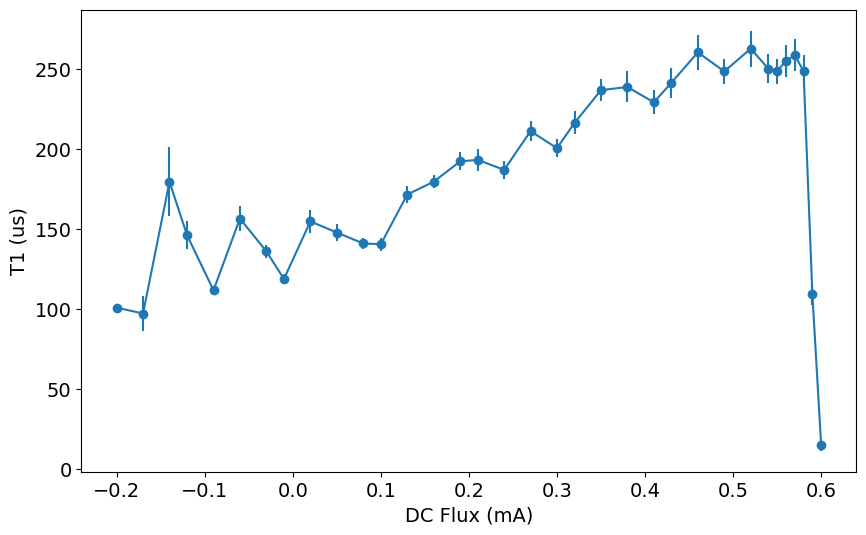

In [338]:
plt.errorbar(DC_flux_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')

In [351]:
DC_flux_list = [-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ]
data_file_list = [82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108,
                  110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
                  139, 142,145,148,151,154,157,160, 162]
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

Text(0.5, 1.0, 'Cache 1 T1 vs DC Flux')

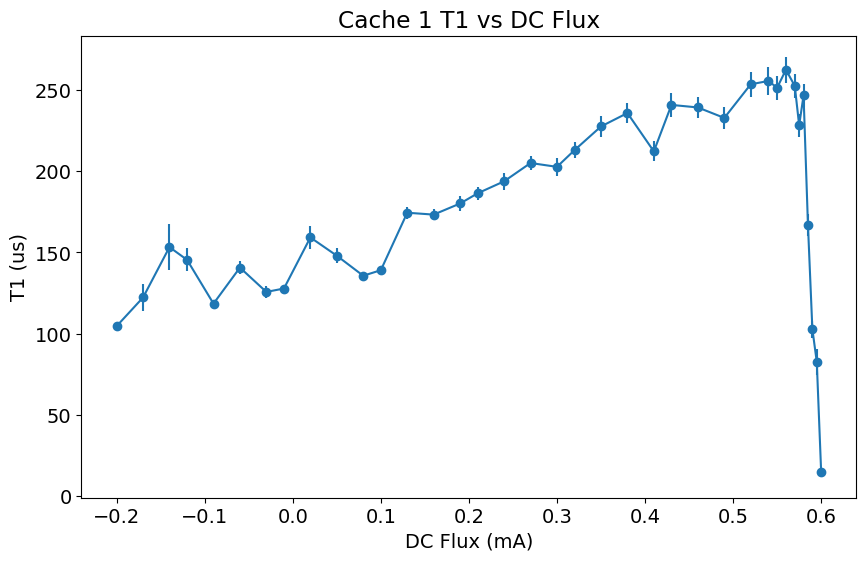

In [353]:
plt.errorbar(DC_flux_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')
plt.title('Cache 1 T1 vs DC Flux')